In [1]:
!pip install matplotlib -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# Regressão Linear Simples

In [2]:
import pandas as pd

In [3]:
df_marcas = pd.DataFrame(
    {
        'marca': ['Coca-cola','Pepsi-cola','Coca-cola Light','Sprite','Dr. Pepper','Mountain Dew','7-up'],
        'gasto_publicidade': [131.3,92.4,60.4,55.7,40.2,29.0,11.6],
        'vendas': [1929.2,1384.6,811.4,541.5,536.9,535.6,219.5]
    }
)
df_marcas

,marca,gasto_publicidade,vendas
0,Coca-cola,131.3,1929.2
1,Pepsi-cola,92.4,1384.6
2,Coca-cola Light,60.4,811.4
3,Sprite,55.7,541.5
4,Dr. Pepper,40.2,536.9
5,Mountain Dew,29.0,535.6
6,7-up,11.6,219.5


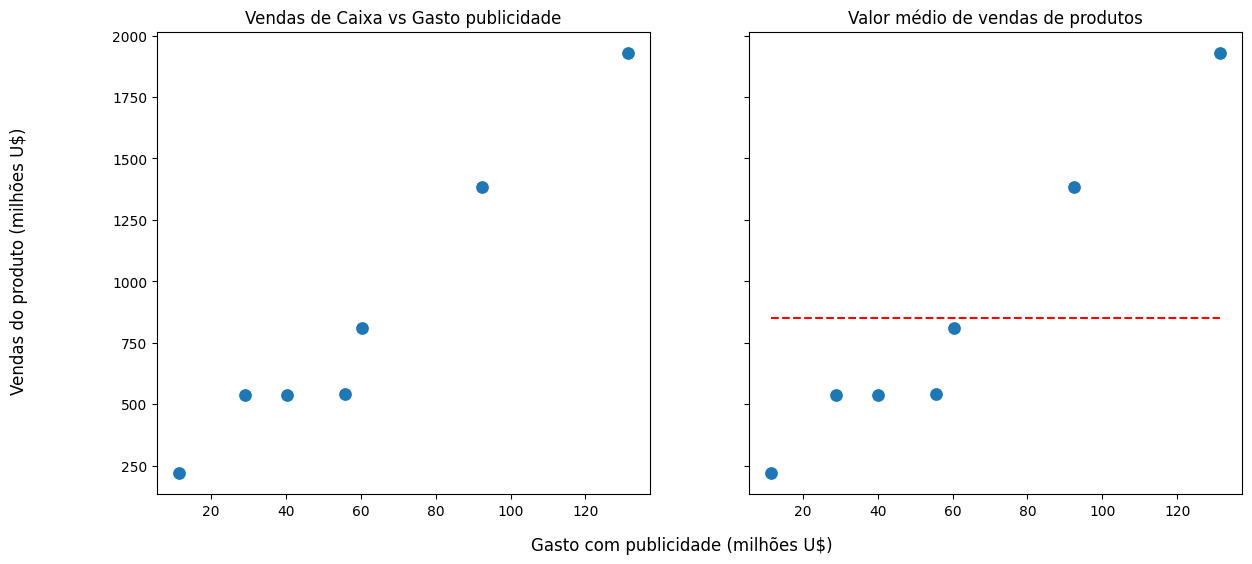

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14, 6))
sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[0], s=100);

axes[0].set_title('Vendas de Caixa vs Gasto publicidade')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[1], s=100);
sns.lineplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas.mean(), ax=axes[1], linestyle='--', color='red')
axes[1].set_title('Valor médio de vendas de produtos')
axes[1].set_xlabel('')
axes[1].set_ylabel('')


fig.supxlabel('Gasto com publicidade (milhões U$)')
fig.supylabel('Vendas do produto (milhões U$)');


In [5]:
X = df_marcas.filter(['gasto_publicidade']).copy()
y = df_marcas['vendas'].copy()

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [7]:
lr.intercept_

-15.420436321709303

In [8]:
lr.coef_

array([14.42378282])

In [9]:
y_pred = lr.predict(X)
y_pred

array([1878.42224799, 1317.33709628,  855.77604603,  787.98426677,
        564.41563306,  402.86926547,  151.89544439])

In [10]:
(y - y_pred)**2

0     2578.380099
1     4524.298217
2     1969.233461
3    60754.493767
4      757.110063
5    17617.447889
6     4570.375939
Name: vendas, dtype: float64

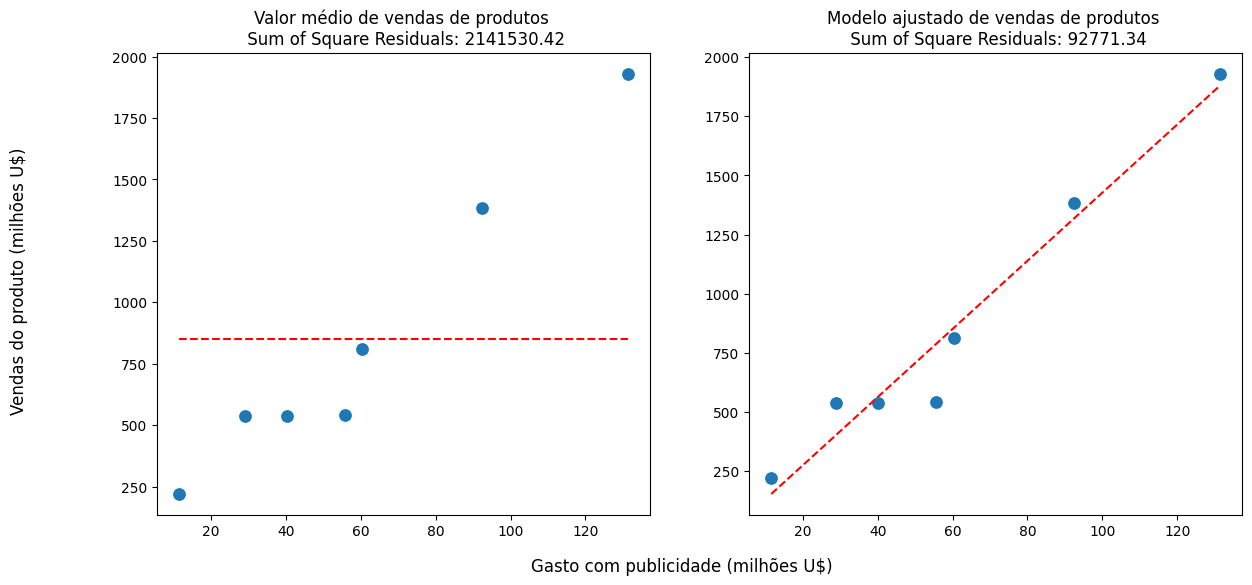

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(14, 6))

sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[0], s=100);
sns.lineplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas.mean(), ax=axes[0], linestyle='--', color='red')

ssr_avg = sum((df_marcas.vendas.mean() - y) ** 2)
axes[0].set_title(f'Valor médio de vendas de produtos \n Sum of Square Residuals: {ssr_avg:.2f}')
axes[0].set_xlabel('')
axes[0].set_ylabel('')


sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[1], s=100);
sns.lineplot(x=df_marcas.gasto_publicidade, y=y_pred, ax=axes[1], linestyle='--', color='red')

ssr_model = sum((y - y_pred) ** 2)
axes[1].set_title(f'Modelo ajustado de vendas de produtos \n Sum of Square Residuals: {ssr_model:.2f}')
axes[1].set_xlabel('')
axes[1].set_ylabel('')


fig.supxlabel('Gasto com publicidade (milhões U$)')
fig.supylabel('Vendas do produto (milhões U$)');


In [12]:
df_marcas_prod = pd.DataFrame(
    {
        'marca': ['Guarana Light','Guarana',],
        'gasto_publicidade': [20, 30],
    }
)
df_marcas_prod

,marca,gasto_publicidade
0,Guarana Light,20
1,Guarana,30


In [13]:
print(lr.predict(df_marcas_prod[['gasto_publicidade']]))

[273.05522009 417.29304829]


In [14]:
def func_total_vendas(b0, b1, x1):
    return round(b0 + (b1 * x1), 4)

In [15]:
func_total_vendas(
    b0=lr.intercept_,
    b1=lr.coef_[0],
    x1=20
)

273.0552

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y, y_pred)

0.9566798871073536